In [ ]:
# import libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path to our CSV file
csv_file_path = '/content/drive/Shareddrives/Machine Learning/Mall_Customers.csv'

data = []
with open(csv_file_path, 'r', errors='replace') as file:
    reader = csv.reader(file)
    for row in reader:
        data.append(row)

df = pd.DataFrame(data[1:], columns=data[0])

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#we need to transform the dummies into boolean
df['Gender'] = df['Gender'].map({'Female': '0', 'Male': '1'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    object
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    object
 3   Annual Income (k$)      200 non-null    object
 4   Spending Score (1-100)  200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB


In [ ]:
df.dtypes

CustomerID                object
Gender                    object
Age                       object
Annual Income (k$)        object
Spending Score (1-100)    object
dtype: object

In [ ]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [ ]:
#descriptive statistic
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


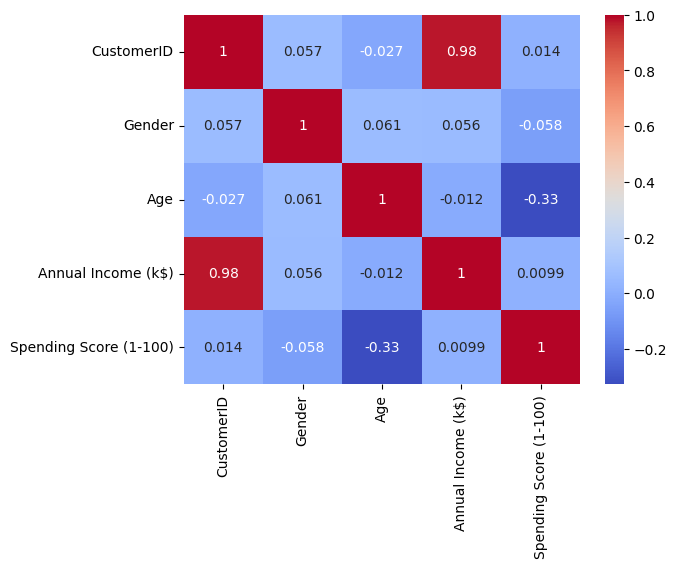

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


High Correlation Between CustomerID and Annual Income: This unsual correlation might suggest some sort of ordering or assignment bias in the way CustomerIDs were assigned (e.g., higher IDs being assigned to newer or higher-income customers)
Negative Correlation Between Age and Spending Score:
as age increases, the spending score tends to decrease. It could imply that younger customers have a higher spending score, which might be useful for targeted marketing strategies.

Standardizing Dataset: Standardizing a dataset involves transforming its features so that they have a mean of 0 and a standard deviation of 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(df)


In [ ]:
dataset

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.0

KMeans :

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

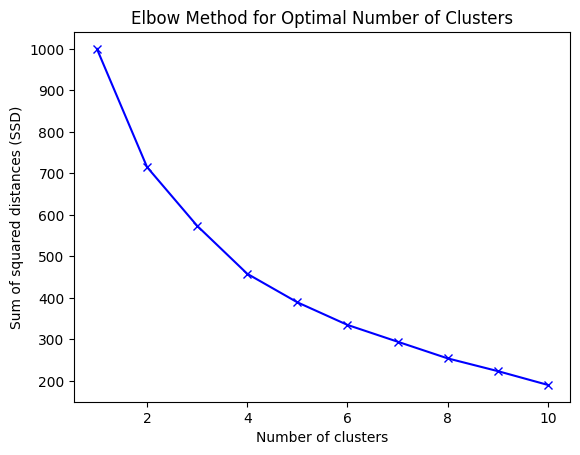

In [ ]:
from sklearn.cluster import KMeans
ssd = []
range_n_clusters = list(range(1, 11))  #total of 10

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(dataset)
    ssd.append(kmeans.inertia_)

# Plotting the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


we might consider 5 as the optimal number of clusters for the KMeans clustering algorithm.
Beyond 5 clusters, the decrease in the sum of squared distances isn't as significant.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

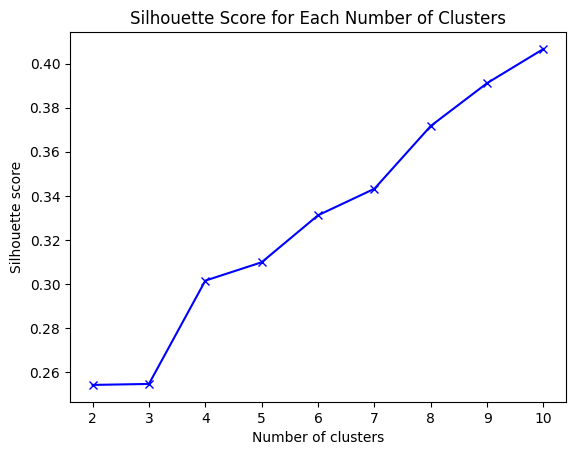

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(dataset, KMeans(n_clusters=i).fit_predict(dataset)) for i in range(2, 11)]
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for Each Number of Clusters')
plt.show()


No Clear Peak, maybe plotting it together will give us a better understanding

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

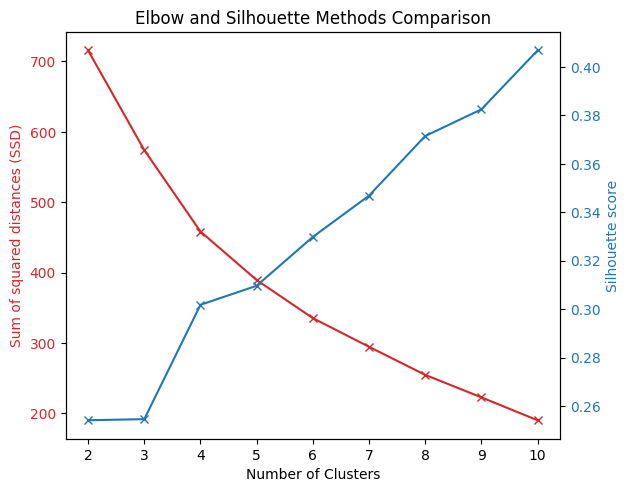

In [ ]:
range_n_clusters = range(2, 11)

ssd = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(dataset)
    ssd.append(kmeans.inertia_)

    # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(dataset, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

fig, ax1 = plt.subplots()

#SSD
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Sum of squared distances (SSD)', color=color)
ax1.plot(range_n_clusters, ssd, 'bx-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

#To plot both
ax2 = ax1.twinx()

#silhouette score
color = 'tab:blue'
ax2.set_ylabel('Silhouette score', color=color)
ax2.plot(range_n_clusters, silhouette_scores, 'bx-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Elbow and Silhouette Methods Comparison')
plt.show()

Now it's really clear that the perfect number of cluster is 5, let's continue our analysis

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


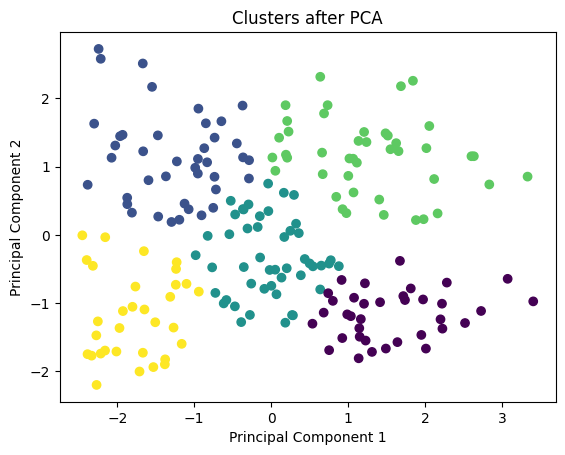

In [ ]:
from sklearn.decomposition import PCA
#PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dataset)

#KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_components)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters after PCA')
plt.show()


Function to plot a visual representation of the graph, since i want to try each method this will make the work faster

In [ ]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()

We need to clarify that we are gonna use the same number of optimal cluster used for K-Means to compare the final results and simplify our code. In each method expect for DBScan and Mean-Shift the optimal number of cluster should be calculated but we are gonna suppose that for each one the optimal number is 5

Affinity Propagation:

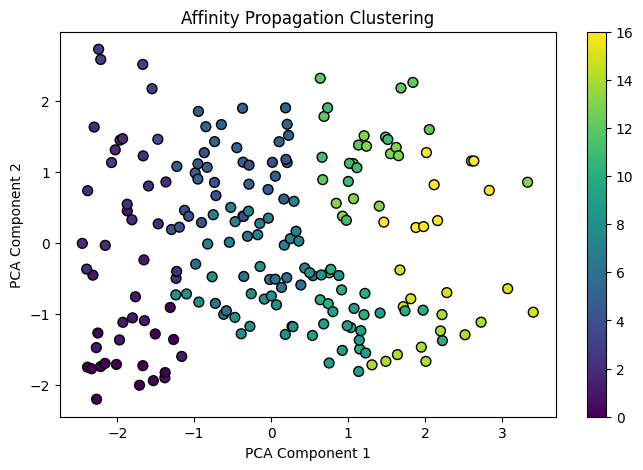

In [ ]:
from sklearn.cluster import AffinityPropagation
affinity_propagation = AffinityPropagation(random_state=42)
affinity_labels = affinity_propagation.fit_predict(dataset)
plot_clusters(pca_components, affinity_labels, 'Affinity Propagation Clustering')


In [ ]:
affinity_labels = affinity_propagation.fit_predict(dataset)
plot_clusters(pca_components, affinity_labels, 'Affinity Propagation Clustering')

Affinity Propagation does not require the number of clusters to be predetermined. Instead, it uses message passing between data points to create clusters based on their similarity, so it has created a larger number of smaller clusters.

Mean-Shift:

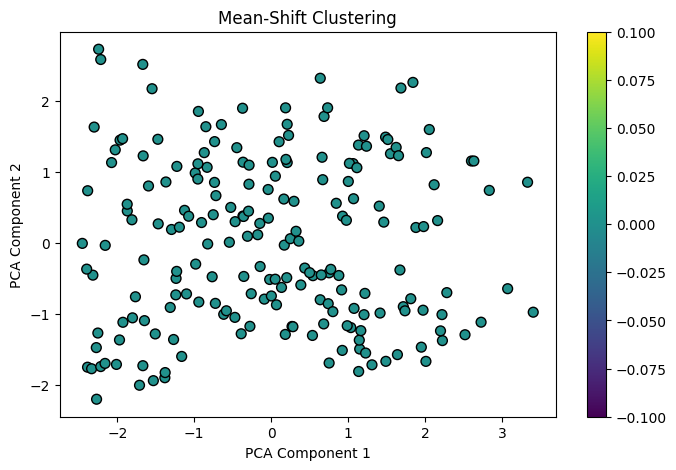

In [ ]:
from sklearn.cluster import MeanShift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(dataset)
plot_clusters(pca_components, mean_shift_labels, 'Mean-Shift Clustering')


The Mean-Shift algorithm looks like it has identified only one cluster. Mean-Shift is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These points are then shifted towards the centroid of points in their neighborhood. This process is repeated until convergence.
Mean-Shift relies on the density of points to find the cluster centers. If the data points are evenly distributed without clear dense regions, or if there is one very dense region, Mean-Shift may not be able to identify separate clusters. Furtherly, after PCA, the data might be transformed in such a way that the density differences are not as pronounced in the reduced-dimensional space, making it difficult for Mean-Shift to identify distinct clusters.

Spectral Clustering:

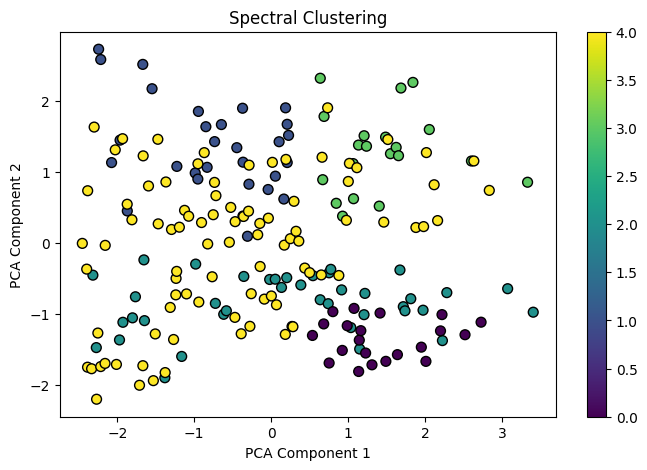

In [ ]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=5, random_state=42)
spectral_labels = spectral.fit_predict(dataset)
plot_clusters(pca_components, spectral_labels, 'Spectral Clustering')


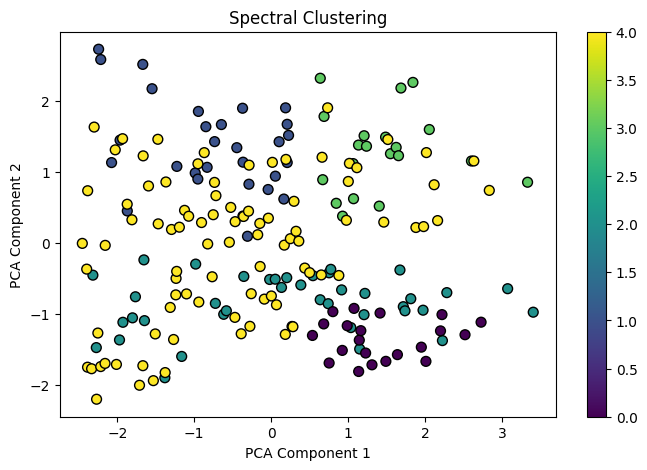

In [ ]:
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=5, random_state=42)
spectral_labels = spectral.fit_predict(dataset)
plot_clusters(pca_components, spectral_labels, 'Spectral Clustering')


Spectral Clustering has effectively captured the underlying structure of the data after PCA reduction. Spectral Clustering uses the eigenvalues of a similarity matrix to reduce the dimensions, capturing the connectivity between points, so it works well when the cluster structure is highly non-linear or when the clusters are non-convex


AgglomerativeClustering:

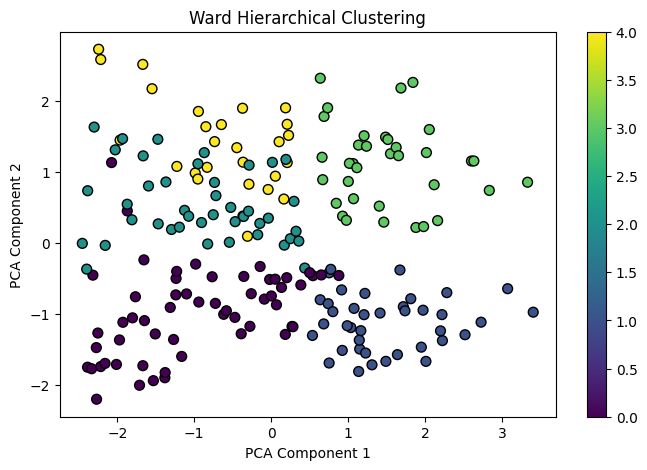

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=5, linkage='ward')
ward_labels = ward.fit_predict(dataset)
plot_clusters(pca_components, ward_labels, 'Ward Hierarchical Clustering')


Ward's method is a hierarchical clustering approach that minimizes the total within-cluster variance. At each step, it finds the pair of clusters that leads to the minimum increase in total within-cluster variance after merging.
Ward's method also tends to create clusters of similar sizes, which can be seen in the relatively balanced cluster sizes

DBSCAN:

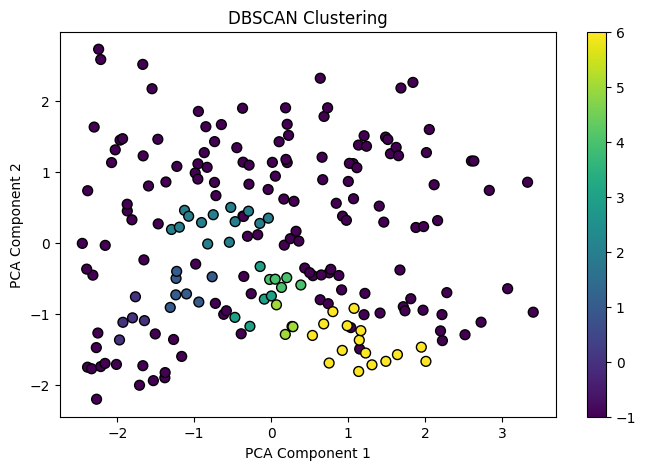

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(dataset)
plot_clusters(pca_components, dbscan_labels, 'DBSCAN Clustering')


 DBSCAN, being a density-based clustering algorithm, identifies clusters as areas of high point density separated by areas of low density. Points in low-density regions that are not assigned to any cluster are typically considered noise (-1 would indicate points classified as noise)
 I think it needs some Tuning of the hyperparameters since he found too many noisy points but to give an equal comparison to each algoritmhs i'm gonna leave it as it is

OPTICS:

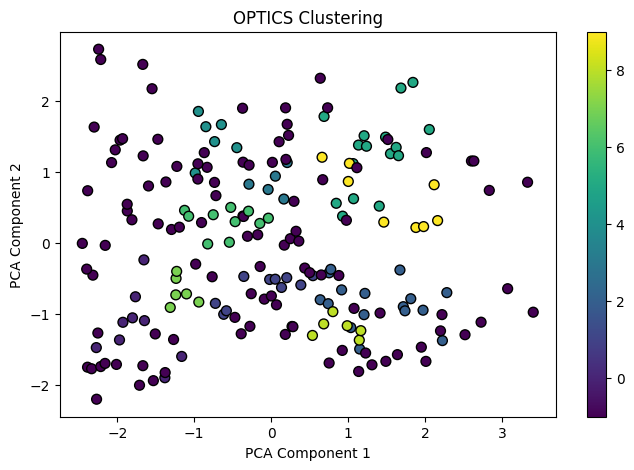

In [ ]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(dataset)
plot_clusters(pca_components, optics_labels, 'OPTICS Clustering')


OPTICS is another density-based technique similar to DBSCAN but with the added ability to capture varying density clusters, also it adapts to the density variation in the dataset, leading to more flexible cluster formation in comparison to DBSCAN. It also identify noise points but it dependes less by the choise of the parameters

Gaussian Mixtures:

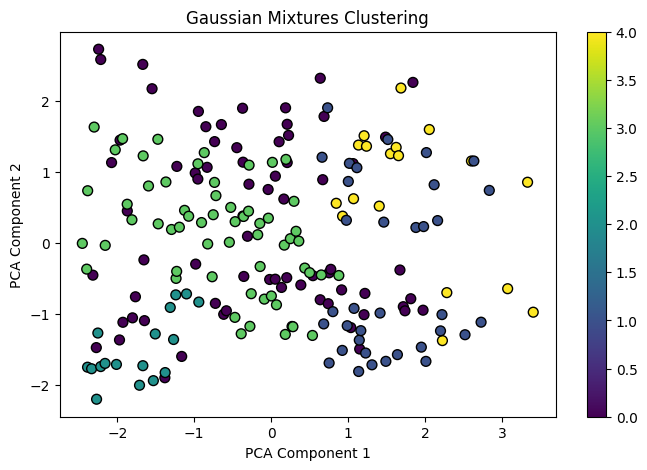

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(dataset)
plot_clusters(pca_components, gmm_labels, 'Gaussian Mixtures Clustering')


GMM is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

BIRCH:

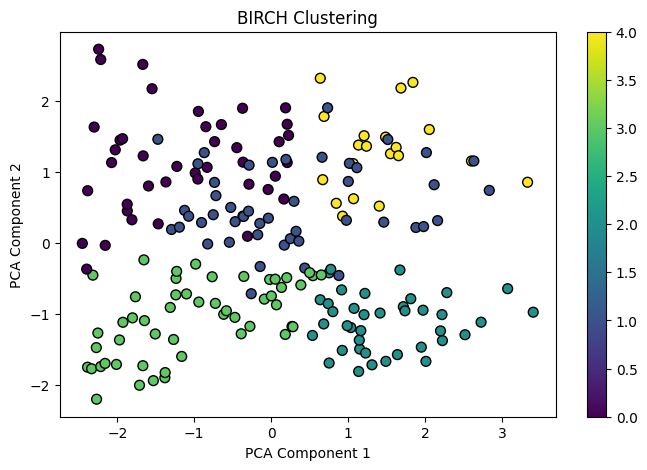

In [ ]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=5)
birch_labels = birch.fit_predict(dataset)
plot_clusters(pca_components, birch_labels, 'BIRCH Clustering')


 BIRCH incrementally builds a CF (Clustering Feature) Tree, a hierarchical data structure for multi-phase clustering. Also, it can be sensitive to the order of the data points because it processes the data incrementally.
In the final phase, BIRCH typically uses another clustering algorithm (like KMeans) on the CF vectors to refine the clusters, that is why until now is the one with most similar results to KMeans

Bisecting K-Means (Not directly available in Scikit-learn, we can implement it manually):

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


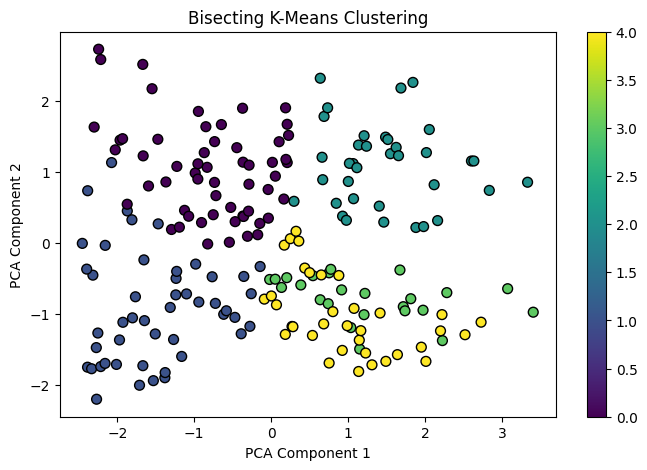

In [ ]:
def bisecting_kmeans(data, num_clusters):
    clusters = []
    initial_cluster = data
    clusters.append(initial_cluster)

    while len(clusters) < num_clusters:
        # Find the cluster with the maximum SSE
        max_sse_cluster_index = np.argmax([calculate_sse(cluster) for cluster in clusters])
        cluster_to_split = clusters.pop(max_sse_cluster_index)

        # Apply K-Means with K=2 to the cluster
        kmeans = KMeans(n_clusters=5)
        kmeans.fit(cluster_to_split)
        split_labels = kmeans.labels_

        # Divide the cluster into two new clusters
        new_cluster_1 = cluster_to_split[split_labels == 0]
        new_cluster_2 = cluster_to_split[split_labels == 1]

        clusters.append(new_cluster_1)
        clusters.append(new_cluster_2)

    final_labels = assign_points_to_clusters(data, clusters)
    return final_labels

def calculate_sse(cluster):
    center = cluster.mean(axis=0)
    sse = np.sum((cluster - center) ** 2)
    return sse

def assign_points_to_clusters(data, clusters):
    final_labels = np.zeros(data.shape[0])
    for i, cluster in enumerate(clusters):
        for point in cluster:

            point_index = np.where(np.all(data == point, axis=1))[0][0]
            final_labels[point_index] = i
    return final_labels

num_clusters = 5
final_cluster_labels = bisecting_kmeans(dataset, num_clusters)
plot_clusters(pca_components, final_cluster_labels, 'Bisecting K-Means Clustering')


 It works by recursively splitting the dataset, applying K-Means with K=2 on the subset of data, and then choosing one of the resulting clusters to split again. This process continues until the desired number of clusters is reached.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                  Algorithm  Silhouette Score
0                   K-Means          0.311797
1      Affinity Propagation          0.377069
2                    DBSCAN         -0.128701
3  Agglomerative Clustering          0.304546
4       Spectral Clustering          0.249674
5         Gaussian Mixtures          0.107997
6                     BIRCH          0.282185
7                    OPTICS         -0.048770


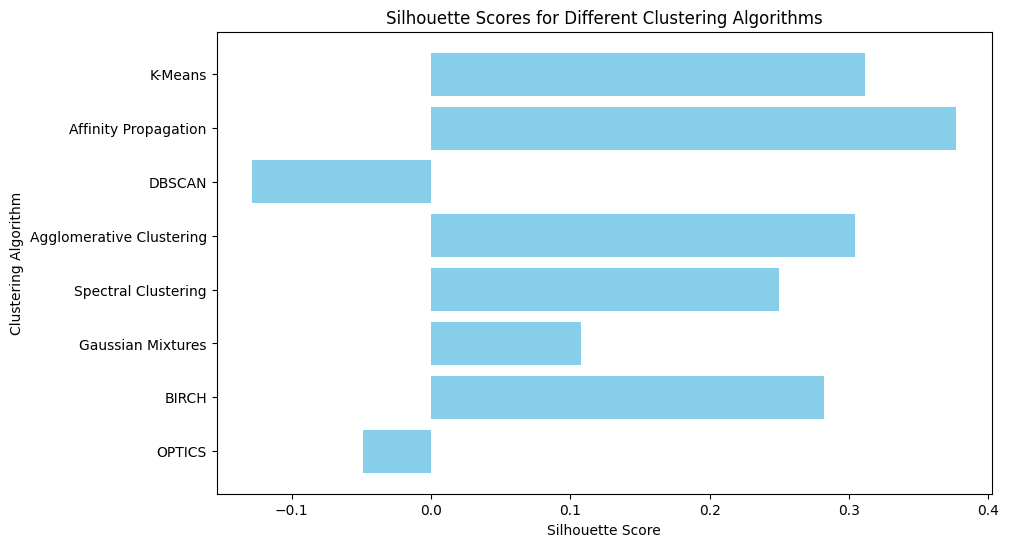

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Run each clustering algorithm
clustering_algorithms = [
    ("K-Means", KMeans(n_clusters=k)),
    ("Affinity Propagation", AffinityPropagation(damping=0.5)),
    ("DBSCAN", DBSCAN(eps=0.5, min_samples=5)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=k, linkage="ward")),
    ("Spectral Clustering", SpectralClustering(n_clusters=k)),
    ("Gaussian Mixtures", GaussianMixture(n_components=k)),
    ("BIRCH", Birch(n_clusters=k)),
    ("OPTICS", OPTICS(min_samples=5)),
]
#collect values
algorithm_names = []
silhouette_scores = []

#calculate Silhouette Scores
for name, model in clustering_algorithms:
    labels = model.fit_predict(dataset)

    silhouette_avg = silhouette_score(dataset, labels)

    algorithm_names.append(name)
    silhouette_scores.append(silhouette_avg)

#dfresults
results_df = pd.DataFrame({'Algorithm': algorithm_names, 'Silhouette Score': silhouette_scores})

print(results_df)

#Plot results
plt.figure(figsize=(10, 6))
plt.barh(results_df['Algorithm'], results_df['Silhouette Score'], color='skyblue')
plt.xlabel('Silhouette Score')
plt.ylabel('Clustering Algorithm')
plt.title('Silhouette Scores for Different Clustering Algorithms')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()



it doesn't work for MeanShift and Bisecting KMeans (since they don't require to specify the number of clusters). Silhouette is the only tecniques we can use to compare the algorithms since we don't have the true labels of data-set, in that case maybe Homogenity would have been the best metric to use

I am surprised by the results: Looking at other notebooks on Kaggle everyone used KMeans as the only algorithm, everyone was so sure it was the most performing one that nobody tried other algorithms. Instead by our research we can claim that Affinity Propagation have the best results

Let's focus now on Affinity Propagation, let's also tune the hyperparameters

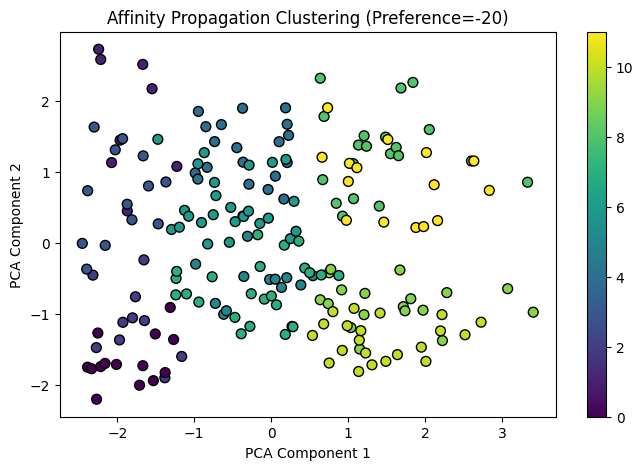

Best Preference Value: -20
Best Silhouette Score: 0.428179367576419


In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

preference_values = [-50, -40, -30, -20, -10, -5, 0, 5, 10, 20]

best_silhouette_score = -1
best_preference = None
best_labels = None

for preference in preference_values:
    model = AffinityPropagation(preference=preference)
    labels = model.fit_predict(dataset)

    num_clusters = len(np.unique(labels))


    if num_clusters <= 20: # Ensure that the number of clusters is not exces, in that case silhouette score doesn't work
        silhouette_avg = silhouette_score(dataset, labels)

        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_preference = preference
            best_labels = labels
#Visualize best results
plot_clusters(pca_components, best_labels, f'Affinity Propagation Clustering (Preference={best_preference})')
plt.show()

print(f"Best Preference Value: {best_preference}")
print(f"Best Silhouette Score: {best_silhouette_score}")
